In [2]:
#***********************************
# Name: Jonah Zembower
# Date: January 25, 2025
# Project: Harvard Research Study on Postural Stability During Heart Catheterization Surgeries
#***********************************

# Importing Libraries and Data

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
# File paths for all pertinent CSVs
file_paths_angles = {
    "lead_max_cases": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Maximum Values\\lead_max_cases.csv",
    "rampart_max_cases": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Maximum Values\\rampart_max_cases.csv",
    "baseline_max_cases": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_max_cases.csv",
    "lead_min_cases": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Minimum Values\\lead_min_cases.csv",
    "rampart_min_cases": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Minimum Values\\rampart_min_cases.csv",
    "baseline_min_cases": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_min_cases.csv",
    "lead_cases_ranges": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Range Values\\lead_cases_ranges.csv",
    "rampart_cases_ranges": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Range Values\\rampart_cases_ranges.csv",
    "baseline_cases_ranges": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_range_cases.csv",
    "lead_sum_duration_inside": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Sum of Duration Inside\\lead_cases_sum_duration_inside.csv",
    "rampart_sum_duration_inside": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Sum of Duration Inside\\rampart_cases_sum_duration_inside.csv",
    "baseline_sum_duration_inside": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_sum_duration_inside.csv",
    "lead_sum_duration_above": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Sum of Duration Above\\lead_cases_sum_duration_above.csv",
    "rampart_sum_duration_above": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Sum of Duration Above\\rampart_cases_sum_duration_above.csv",
    "baseline_sum_duration_above": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_sum_duration_above.csv",
    "lead_sum_duration_below": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Sum of Duration Below\\lead_cases_sum_duration_below.csv",
    "rampart_sum_duration_below": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Sum of Duration Below\\rampart_cases_sum_duration_below.csv",
    "baseline_sum_duration_below": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_sum_duration_below.csv",
    "lead_mean_inside": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Mean Inside Values\\lead_cases_mean_inside.csv",
    "rampart_mean_inside": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Mean Inside Values\\rampart_cases_mean_inside.csv",
    "baseline_mean_inside": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_mean_inside.csv",
    "lead_mean_above": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Mean Above Values\\lead_cases_mean_above.csv",
    "rampart_mean_above": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Mean Above Values\\rampart_cases_mean_above.csv",
    "baseline_mean_above": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_mean_above.csv",
    "lead_mean_below": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Mean Below Values\\lead_cases_mean_below.csv",
    "rampart_mean_below": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Mean Below Values\\rampart_cases_mean_below.csv",
    "baseline_mean_below": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Baseline Values\\baseline_mean_below.csv",
}

# Read each CSV into a DataFrame
csv_data_angles = {name: pd.read_csv(path) for name, path in file_paths_angles.items()}

In [5]:
# Load in the data
survey_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\survey.csv')

# File paths for all pertinent CSVs
file_paths_surveys = {
    "case_with_dummy": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\survey.csv",
    "case_data" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\CASEDATA_RAMPART_WITH LABELS.csv",
    "survey_data": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\BASELINESURVEY_RAMPART_WITH LABELS.csv",
    "discomfort_data": "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\Extra Data\\DISCOMFORT SURVEY.csv"
}

# Read each CSV into a DataFrame
csv_data_surveys = {name: pd.read_csv(path) for name, path in file_paths_surveys.items()}

In [6]:
# File paths for all pertinent CSVs
file_paths_emg = {
    "Time_00" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_00.csv",
    "Time_01" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_01.csv",
    "Time_02" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_02.csv",
    "Time_03" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_03.csv",
    "Time_04" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_04.csv",
    "Time_05" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_05.csv",
    "Time_06" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_06.csv",
    "Time_07" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_07.csv",
    "Time_08" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_08.csv",
    "Time_09" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_09.csv",
    "Time_10" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG APDFs\\Time_10.csv",
    "Mean" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Mean.csv",
    "Peak" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Peak.csv",
    "Variability" : "C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\EMG Percentages\\Variability.csv",
}

# Read each CSV into a DataFrame
csv_data_emg = {name: pd.read_csv(path) for name, path in file_paths_emg.items()}
    

In [7]:
combined_sum_duration = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Full Sum of Duration Merged\\combined_sum_duration.csv')

In [8]:
# Note the cases with the operators are with this format: CaseNumber_OperatorNumber
Lead_Operators = [    '1_001', '2_001', '4_001', '2_002', '3_002', 
    '1_003', '2_003', '4_003',             
    '1_004', '2_004', '3_005', '5_005', '1_006',
    '2_006', '1_007', '2_007', '2_008', '3_008',
    '2_019', '3_019', '1_020','2_020', '1_021','2_021',
    '1_022', '4_022', '1_023',
    '2_023', '1_024','2_024', '1_026', '2_026','1_027',
    '1_028', '2_028', '1_029', '2_029',
    '2_030', '3_030', '2_031']
# Note the cases with the operators are with this format: CaseNumber_OperatorNumber
Rampart_Operators = [
    '3_001','6_001', '1_002',
    '4_002', '3_004', '4_004', '1_005', '4_005',
    '3_006', '4_006', '3_007', '4_007', '1_008',
    '4_008', '1_019', '4_019', '2_022', '3_022', '4_023',
    '1_030', '1_031'
]
# Note the index here is just the OperatorNumber
Baseline_Operators = [
    1, 2, 3, 4, 5, 6,
    7, 8,
    19, 20, 21, 22, 23,
    24, 26, 27, 28, 29, 30, 31
]

In [9]:
# Columns for Cervical/Thoracic angles
cervical_thoracic_columns = ['Cervical Flexion Fwd [deg]', 'Cervical Flexion Lat RT [deg]', 'Cervical Axial RT [deg]'
       ,'Thoracic Flexion Fwd [deg]', 'Thoracic Flexion Lat RT [deg]', 'Thoracic Axial RT [deg]']
# Columns for Lumbar/Pelvic angles
lumbar_pelvic_columns = ['Torso-Pelvic Flexion Fwd [deg]',
       'Torso-Pelvic Flexion Lat RT [deg]',
       'Torso-Pelvic Axial RT [deg]','Lumbar Flexion Fwd [deg]',
       'Lumbar Flexion Lat RT [deg]',
       'Lumbar Axial RT [deg]']

# Predictive Factors

- Look at multiple linear regression relating to the values.
- Understand what is used to predict different values using different predictor and predicted variables.
- Build a logistic regression model of factors predicting high-risk positions. Look maybe at the cervical spine and what are the factors that cause it. Use the characteristics. That isn’t a high priority for the abstract but would be compelling as well. 

In [10]:
combined_sum_duration.columns

Index(['Participant ID', 'Age', 'Race ', 'Ethnicity ', 'Gender',
       'Role in cath lab',
       'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Participant Height (in)', 'Participant Weight (lbs)',
       'Do you exercise...', 'Cardio', 'Upper Body Strength Training',
       'Lower body strength training', 'Abdominal strength training', 'Yoga',
       'Stretching', 'Pilates', 'Other Exercise',
       'Do you have a history of orthopedic injury?', 'Neck Injury',
       'Back Injury', 'Shoulder Injury', 'Leg Injury', 'Arm Injury',
       'Other Injury', 'Have you ever had surgery for orthopedic injury?',
       'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain', 'Date of Case',
       'Case Number for the day', 'Case being done...',
       'Participant wearing...', 'Is participant a technologist?',
       'How many hours of sleep did participant have the night

# Multiple Linear Regression Model:

Look into making these columns into integer dummy variables that allow for prediction assessment.

In [11]:
# Convert the Race column into dummy variables
combined_sum_duration_dummies = pd.get_dummies(combined_sum_duration, columns=['Race ','Ethnicity ','Gender','Role in cath lab','Do you exercise...','Type of Case','Age Group','Weight Category','Height Category','Exercise Category','BMI Category','Case being done...','Participant wearing...','Is participant a technologist?'])

# Display the first few rows of the updated DataFrame
combined_sum_duration_dummies.head()

,Participant ID,Age,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Cardio,Upper Body Strength Training,Lower body strength training,Abdominal strength training,Yoga,...,Exercise Category_4+ days a week,Exercise Category_Not at all,BMI Category_Normal weight,BMI Category_Obesity I,BMI Category_Overweight,Case being done..._With Rampart shield,Case being done..._Without Rampart shield,Participant wearing..._lead,Participant wearing..._no lead,Is participant a technologist?_No
0,1_001,34,2.0,65,168,Checked,Checked,Checked,Checked,Unchecked,...,False,False,False,False,True,False,True,True,False,True
1,2_001,34,2.0,65,168,Checked,Checked,Checked,Checked,Unchecked,...,False,False,False,False,True,False,True,True,False,True
2,4_001,34,2.0,65,168,Checked,Checked,Checked,Checked,Unchecked,...,False,False,False,False,True,True,False,True,False,True
3,2_002,34,2.0,69,145,Checked,Checked,Checked,Checked,Unchecked,...,False,False,True,False,False,False,True,True,False,True
4,3_002,34,2.0,69,145,Checked,Checked,Checked,Checked,Unchecked,...,False,False,True,False,False,False,True,True,False,True


In [12]:
# Replace 'Checked' with 1 and 'Unchecked' with 0
combined_sum_duration_dummies.replace({'Checked': 1, 'Unchecked': 0}, inplace=True)

# Replace 'True' with 1 and 'False' with 0
combined_sum_duration_dummies.replace({True: 1, False: 0}, inplace=True)

combined_sum_duration_dummies.replace({'Yes': 1, 'No': 0}, inplace=True)

# Display the first few rows of the updated DataFrame
combined_sum_duration_dummies.head()

C:\Users\jrzem\AppData\Local\Temp\ipykernel_30328\3935769171.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_sum_duration_dummies.replace({'Checked': 1, 'Unchecked': 0}, inplace=True)
C:\Users\jrzem\AppData\Local\Temp\ipykernel_30328\3935769171.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_sum_duration_dummies.replace({True: 1, False: 0}, inplace=True)
C:\Users\jrzem\AppData\Local\Temp\ipykernel_30328\3935769171.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

,Participant ID,Age,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Cardio,Upper Body Strength Training,Lower body strength training,Abdominal strength training,Yoga,...,Exercise Category_4+ days a week,Exercise Category_Not at all,BMI Category_Normal weight,BMI Category_Obesity I,BMI Category_Overweight,Case being done..._With Rampart shield,Case being done..._Without Rampart shield,Participant wearing..._lead,Participant wearing..._no lead,Is participant a technologist?_No
0,1_001,34,2.0,65,168,1,1,1,1,0,...,0,0,0,0,1,0,1,1,0,1
1,2_001,34,2.0,65,168,1,1,1,1,0,...,0,0,0,0,1,0,1,1,0,1
2,4_001,34,2.0,65,168,1,1,1,1,0,...,0,0,0,0,1,1,0,1,0,1
3,2_002,34,2.0,69,145,1,1,1,1,0,...,0,0,1,0,0,0,1,1,0,1
4,3_002,34,2.0,69,145,1,1,1,1,0,...,0,0,1,0,0,0,1,1,0,1


In [13]:
# Label the predictor columns for multiple linear regression
predictors = [combined_sum_duration_dummies.columns[1:]]


In [14]:
predictors

[Index(['Age',
        'How many years has the participant worked in the cardiac catheterization laboratory?',
        'Participant Height (in)', 'Participant Weight (lbs)', 'Cardio',
        'Upper Body Strength Training', 'Lower body strength training',
        'Abdominal strength training', 'Yoga', 'Stretching',
        ...
        'Exercise Category_4+ days a week', 'Exercise Category_Not at all',
        'BMI Category_Normal weight', 'BMI Category_Obesity I',
        'BMI Category_Overweight', 'Case being done..._With Rampart shield',
        'Case being done..._Without Rampart shield',
        'Participant wearing..._lead', 'Participant wearing..._no lead',
        'Is participant a technologist?_No'],
       dtype='object', length=117)]

In [15]:
# Convert the DataFrame to a NumPy array
input_data_array = np.asarray(combined_sum_duration_dummies)

# Display the shape and first few rows of the array
print("Shape of the array:", input_data_array.shape)
print("First few rows of the array:\n", input_data_array[:5])

Shape of the array: (61, 118)
First few rows of the array:
 [['1_001' 34 2.0 65 168 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
  '6/6/2024' 'First' 3.0 0 1 0 0 0 0 0 0 36 456.0 0.6 61.9 70.0 11.8194
  36.5534 33.7528145 0.0298091 6.5797591 0.38186 0.496634 0.191505
  0.502384 0.638756 0.0 0.0 27.5819 0.0 0.0 0.41367 0.203419 15.491
  0.77522 0.126597 1.651 76.203456 27.95635338016238 0 1 0 0 0 0 0 0 1 1
  0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
  0 1 1 0 1]
 ['2_001' 34 2.0 65 168 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
  '6/6/2024' 'Second' 3.0 1 0 0 0 0 0 0 0 44 331.0 0.0 18.3 90.0 11.2041
  39.1383 1.5114649999999998 0.250505 1.543595 0.0641239 0.4076059
  0.591541 0.190936 0.647431 0.0 0.0 3.07144 0.0 0.0 0.0980929 0.292731
  8.49509 0.199663 0.507965 1.651 76.203456 27.95635338016238 0 1 0 0 0 0
  0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 1 1 0 1]
 ['4_001' 34 2.0 65 168 1 1 1 1 0 1 0 0 0 0 0 0 0 0 

In [16]:
# Filter out columns with non-integer or non-float values
predictors_filtered = combined_sum_duration_dummies.select_dtypes(include=['int64', 'float64']).columns

# Update the predictors list
predictors = [predictors_filtered]

# Display the updated predictors
predictors

[Index(['Age',
        'How many years has the participant worked in the cardiac catheterization laboratory?',
        'Participant Height (in)', 'Participant Weight (lbs)', 'Cardio',
        'Upper Body Strength Training', 'Lower body strength training',
        'Abdominal strength training', 'Yoga', 'Stretching',
        ...
        'Exercise Category_4+ days a week', 'Exercise Category_Not at all',
        'BMI Category_Normal weight', 'BMI Category_Obesity I',
        'BMI Category_Overweight', 'Case being done..._With Rampart shield',
        'Case being done..._Without Rampart shield',
        'Participant wearing..._lead', 'Participant wearing..._no lead',
        'Is participant a technologist?_No'],
       dtype='object', length=115)]

In [17]:
# Drop rows with NaN values
combined_sum_duration_dummies = combined_sum_duration_dummies.dropna()

Now let's check for overcorrelated values.

In [18]:
combined_sum_duration_dummies[predictors[0]].to_csv('combined_sum_duration_dummies_for_regression.csv', index=False)

Read in the new csv for easier processing.

In [19]:
# Read in the dummy variable converted data
multiple_regression_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\combined_sum_duration_dummies_for_regression.csv')

In [20]:
# Calculate the correlation matrix
correlation_matrix = multiple_regression_data.corr()

# Display the correlation matrix
correlation_matrix

,Age,How many years has the participant worked in the cardiac catheterization laboratory?,Participant Height (in),Participant Weight (lbs),Cardio,Upper Body Strength Training,Lower body strength training,Abdominal strength training,Yoga,Stretching,...,Exercise Category_4+ days a week,Exercise Category_Not at all,BMI Category_Normal weight,BMI Category_Obesity I,BMI Category_Overweight,Case being done..._With Rampart shield,Case being done..._Without Rampart shield,Participant wearing..._lead,Participant wearing..._no lead,Is participant a technologist?_No
Age,1.000000,0.851986,0.087480,-0.149971,0.258227,-0.142890,-0.052713,-0.075136,0.485713,-0.250092,...,0.272514,-0.110533,1.977962e-01,-0.019729,-0.186288,-0.130101,0.130101,0.092985,-0.092985,NaN
How many years has the participant worked in the cardiac catheterization laboratory?,0.851986,1.000000,0.094407,-0.234012,0.144371,-0.188863,-0.093679,-0.182507,0.443601,-0.331250,...,0.345954,-0.088409,3.358430e-01,-0.014532,-0.333865,-0.008897,0.008897,-0.008867,0.008867,NaN
Participant Height (in),0.087480,0.094407,1.000000,0.335353,-0.595491,0.318523,0.296313,0.238197,-0.447129,0.078741,...,0.581512,0.401129,1.944867e-01,-0.260660,0.040227,-0.170176,0.170176,0.142313,-0.142313,NaN
Participant Weight (lbs),-0.149971,-0.234012,0.335353,1.000000,-0.399831,0.080309,0.070160,-0.287414,-0.401597,-0.196387,...,0.221825,0.098523,-7.583653e-01,0.567808,0.258516,-0.032330,0.032330,0.080648,-0.080648,NaN
Cardio,0.258227,0.144371,-0.595491,-0.399831,1.000000,-0.013507,-0.093633,-0.066667,0.123091,0.197583,...,-0.400066,-0.612372,-7.270832e-17,0.197583,-0.182953,0.136083,-0.136083,-0.123613,0.123613,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case being done..._With Rampart shield,-0.130101,-0.008897,-0.170176,-0.032330,0.136083,-0.049629,-0.016382,-0.081650,-0.050252,-0.018615,...,-0.133631,-0.166667,-1.896631e-16,0.167531,-0.155126,1.000000,-1.000000,-0.958830,0.958830,NaN
Case being done..._Without Rampart shield,0.130101,0.008897,0.170176,0.032330,-0.136083,0.049629,0.016382,0.081650,0.050252,0.018615,...,0.133631,0.166667,1.804112e-16,-0.167531,0.155126,-1.000000,1.000000,0.958830,-0.958830,NaN
Participant wearing..._lead,0.092985,-0.008867,0.142313,0.080648,-0.123613,0.001670,-0.021495,0.041204,0.035503,-0.005636,...,0.116890,0.159805,-3.364316e-02,-0.099574,0.126994,-0.958830,0.958830,1.000000,-1.000000,NaN
Participant wearing..._no lead,-0.092985,0.008867,-0.142313,-0.080648,0.123613,-0.001670,0.021495,-0.041204,-0.035503,0.005636,...,-0.116890,-0.159805,3.364316e-02,0.099574,-0.126994,0.958830,-0.958830,-1.000000,1.000000,NaN


In [21]:
# Find correlations that are higher than 0.7 or less than -0.7
high_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Drop NaN values
high_corr = high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Display the high correlations
high_corr

high_corr.to_csv('high_correlations.csv')

Some columns to eliminate initially: 
- Participant wearing..._no lead
- Other Exercise
- Total radiation (mGy) from procedure log
- Total contrast (mL)
- Anything with LT
- Participant Height (m)
- Participant Weight (kg)
- Participant Height (in)
- Participant Weight (lbs)
- BMI
- Age
- Case being done..._With Rampart shield
- Case being done..._Without Rampart shield

In [22]:
columns_to_drop = [
    'Participant wearing..._no lead', 'Other Exercise', 'Total radiation (mGy) from procedure log', 
    'Total contrast (mL)', 'Participant Height (m)', 'Participant Weight (kg)', 
    'Participant Height (in)', 'Participant Weight (lbs)', 'BMI', 'Age', 
    'Case being done..._With Rampart shield', 'Case being done..._Without Rampart shield'
]

# Drop columns containing 'LT'
columns_to_drop.extend([col for col in multiple_regression_data.columns if 'LT' in col])

# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame
multiple_regression_data.head()

,How many years has the participant worked in the cardiac catheterization laboratory?,Cardio,Upper Body Strength Training,Lower body strength training,Abdominal strength training,Yoga,Stretching,Pilates,Do you have a history of orthopedic injury?,Neck Injury,...,Exercise Category_1 day a week,Exercise Category_1-3 days a month,Exercise Category_2-3 days a week,Exercise Category_4+ days a week,Exercise Category_Not at all,BMI Category_Normal weight,BMI Category_Obesity I,BMI Category_Overweight,Participant wearing..._lead,Is participant a technologist?_No
0,2.0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,1
1,2.0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,1
2,2.0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
3,2.0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
4,5.0,1,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,1


#### Showcase the initial Mutliple Linear Regression Model:

In [23]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.940
Model:                                 OLS   Adj. R-squared:                  0.632
Method:                      Least Squares   F-statistic:                     3.053
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):             0.0494
Time:                             10:31:33   Log-Likelihood:                -128.28
No. Observations:                       50   AIC:                             340.6
Df Residuals:                            8   BIC:                             420.9
Df Model:                               41                                         
Covariance Type:                 nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------

In [24]:
# Output the columns with P>|t| values greater than 0.50
columns_to_drop = model.pvalues[model.pvalues > 0.50].index
columns_to_drop

columns_to_drop = [
    'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Abdominal strength training', 'Pilates', 'Back Injury', 'Arm Injury',
       'Neck Pain', 'Leg Pain', 'Left Femoral', 'Right Jugular',
       'Left Jugular', 'Right Brachial Vein', 'Left Brachial Vein',
       'Cervical Flexion Fwd [deg]', 'Thoracic Flexion Lat RT [deg]',
       'Race _White European', 'Ethnicity _Hispanic or Latino',
       'Gender_female', 'Role in cath lab_General Fellow',
       'Role in cath lab_Interventional Fellow',
       'Do you exercise..._1 day a week', 'Do you exercise..._4+ days a week',
       'Type of Case_CTO PCI', 'Type of Case_Complex PCI',
       'Type of Case_Right heart catheterization', 'Age Group_30-40',
       'Age Group_40-50', 'Weight Category_141-160', 'Weight Category_201-220',
       'Height Category_66-70', 'Height Category_71-75',
       'Exercise Category_1 day a week', 'Exercise Category_4+ days a week',
       'BMI Category_Normal weight', 'BMI Category_Obesity I',
       'Participant wearing..._lead']
# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)


Now begin to run the regression model again.

In [25]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.927
Model:                                 OLS   Adj. R-squared:                  0.777
Method:                      Least Squares   F-statistic:                     6.160
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):           0.000172
Time:                             10:31:33   Log-Likelihood:                -133.14
No. Observations:                       50   AIC:                             334.3
Df Residuals:                           16   BIC:                             399.3
Df Model:                               33                                         
Covariance Type:                 nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [26]:
# Output the columns with P>|t| values greater than 0.50
columns_to_drop = model.pvalues[model.pvalues > 0.50].index
columns_to_drop

columns_to_drop = ['Neck Injury', 'Arm Pain', 'Other Pain',
       'Ethnicity _Not Hispanic or Latino',
       'Do you exercise..._2-3 days a week', 'Weight Category_161-180',
       'Exercise Category_2-3 days a week']

# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)

Run another regression model potentially to reduce the columns to what we have:

In [27]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.927
Model:                                 OLS   Adj. R-squared:                  0.777
Method:                      Least Squares   F-statistic:                     6.160
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):           0.000172
Time:                             10:31:33   Log-Likelihood:                -133.14
No. Observations:                       50   AIC:                             334.3
Df Residuals:                           16   BIC:                             399.3
Df Model:                               33                                         
Covariance Type:                 nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [28]:
# Output the columns with P>|t| values greater than 0.50
columns_to_drop = model.pvalues[model.pvalues > 0.50].index
columns_to_drop

columns_to_drop = ['Yoga', 'Lumbar Axial RT [deg]', 'Lumbar Flexion Lat RT [deg]']

# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)

Run another regression model:

In [29]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.927
Model:                                 OLS   Adj. R-squared:                  0.777
Method:                      Least Squares   F-statistic:                     6.160
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):           0.000172
Time:                             10:31:33   Log-Likelihood:                -133.14
No. Observations:                       50   AIC:                             334.3
Df Residuals:                           16   BIC:                             399.3
Df Model:                               33                                         
Covariance Type:                 nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [30]:
# Output the columns with P>|t| values greater than 0.20
columns_to_drop = model.pvalues[model.pvalues > 0.20].index
columns_to_drop

columns_to_drop = ['Do you have any chronic pain syndromes?']

# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)

And another model:

In [31]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.927
Model:                                 OLS   Adj. R-squared:                  0.777
Method:                      Least Squares   F-statistic:                     6.160
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):           0.000172
Time:                             10:31:33   Log-Likelihood:                -133.14
No. Observations:                       50   AIC:                             334.3
Df Residuals:                           16   BIC:                             399.3
Df Model:                               33                                         
Covariance Type:                 nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------

Now make the model p-values more strict to really reduce the variables:

In [32]:
# Output the columns with P>|t| values greater than 0.20
columns_to_drop = model.pvalues[model.pvalues > 0.20].index
columns_to_drop

columns_to_drop = ['Stretching', 'Do you have a history of orthopedic injury?',
       'Leg Injury', 'Other Injury', 'Shoulder Pain',
       'How many hours of sleep did participant have the night before',
       'Race _Asian-East', 'Race _South Asian',
       'Do you exercise..._Not at all', 'Age Group_50+',
       'Weight Category_0-140', 'Exercise Category_Not at all',
       'Is participant a technologist?_No']

# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)

In [33]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.919
Model:                                 OLS   Adj. R-squared:                  0.778
Method:                      Least Squares   F-statistic:                     6.554
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):           5.43e-05
Time:                             10:31:34   Log-Likelihood:                -135.87
No. Observations:                       50   AIC:                             335.7
Df Residuals:                           18   BIC:                             396.9
Df Model:                               31                                         
Covariance Type:                 nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------

Now make it even more strict:

In [34]:
# Output the columns with P>|t| values greater than 0.05
columns_to_drop = model.pvalues[model.pvalues > 0.05].index
columns_to_drop

columns_to_drop = ['Cardio', 'Upper Body Strength Training',
       'Lower body strength training', 'Shoulder Injury', 'Back Pain',
       'Left Radial', 'Right Femoral',
       'Total case length in minutes (first lidocaine injection - sheath removal)',
       'Participant radiation (mrem)', 'Control Radiation (mrem)',
       'Lumbar Flexion Fwd [deg]', 'Torso-Pelvic Axial RT [deg]',
       'Race _Black African', 'Race _Caucasian', 'Race _White Middle Eastern',
       'Race _White North American', 'Gender_male',
       'Role in cath lab_Attending', 'Do you exercise..._1-3 days a month',
       'Type of Case_TAVR', 'Weight Category_181-200',
       'Exercise Category_1-3 days a month', 'BMI Category_Overweight']

# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)

In [35]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.441
Model:                                 OLS   Adj. R-squared:                  0.259
Method:                      Least Squares   F-statistic:                     2.429
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):             0.0192
Time:                             10:31:34   Log-Likelihood:                -184.06
No. Observations:                       50   AIC:                             394.1
Df Residuals:                           37   BIC:                             419.0
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [36]:
# Output the columns with P>|t| values greater than 0.05
columns_to_drop = model.pvalues[model.pvalues > 0.05].index
columns_to_drop

columns_to_drop = ['Have you ever had surgery for orthopedic injury?',
       'Thoracic Axial RT [deg]', 'Thoracic Flexion Fwd [deg]',
       'Torso-Pelvic Flexion Fwd [deg]',
       'Type of Case_Coronary Arteriogram w/ no intervention',
       'Type of Case_Non-Complex PCI', 'Type of Case_Other',
       'Height Category_60-65']

# Drop the specified columns
multiple_regression_data = multiple_regression_data.drop(columns=columns_to_drop)

In [37]:
# Define the target variable
target = 'Cervical Axial RT [deg]'

# Define the predictor variables
predictors = multiple_regression_data.drop(columns=[target])

# Add a constant to the predictor variables
predictors = sm.add_constant(predictors)

# Fit the multiple linear regression model
model = sm.OLS(multiple_regression_data[target], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.350
Model:                                 OLS   Adj. R-squared:                  0.292
Method:                      Least Squares   F-statistic:                     6.057
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):           0.000549
Time:                             10:31:34   Log-Likelihood:                -187.82
No. Observations:                       50   AIC:                             385.6
Df Residuals:                           45   BIC:                             395.2
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

I was able to really reduce the variables but I am finding little luck in getting a high predictability for the model. It may be hard to reduce the variables to only a few. I can try more outcomes, but it showcases that the data is found to impact the sum of duration in risk positions by a large variety of factors. There really aren't a couple that impact it a lot more than the others to focus on. This reflects what we can expect biomechanically.

# PCA Analysis:

We want to see the distinct groupings related to the different variable metrics. Could we see that there are certain parameters grouped together that put someone in high risk positions. Is someone experiencing high-risk while in unhealthy states of habits in lifestyle.

In [38]:
# Read in the dummy variable converted data
multiple_regression_data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\combined_sum_duration_dummies_for_regression.csv')

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(multiple_regression_data)

# Perform PCA
pca = PCA(n_components=5)  # You can change the number of components as needed
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

# Add the target variable to the DataFrame
pca_df[target] = multiple_regression_data[target].values

# Display the first few rows of the PCA DataFrame
pca_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Cervical Axial RT [deg]
0,1.400957,1.739429,-2.361661,1.932539,-0.408409,36.55340
1,1.517617,2.012076,-2.230364,1.501527,-1.078159,39.13830
2,2.926819,-0.013937,-3.153560,-1.216547,1.742005,52.19620
3,3.117104,0.020276,-2.869833,-1.026040,1.983654,54.53905
4,0.938904,1.880752,-1.038081,0.864641,3.506391,30.99228


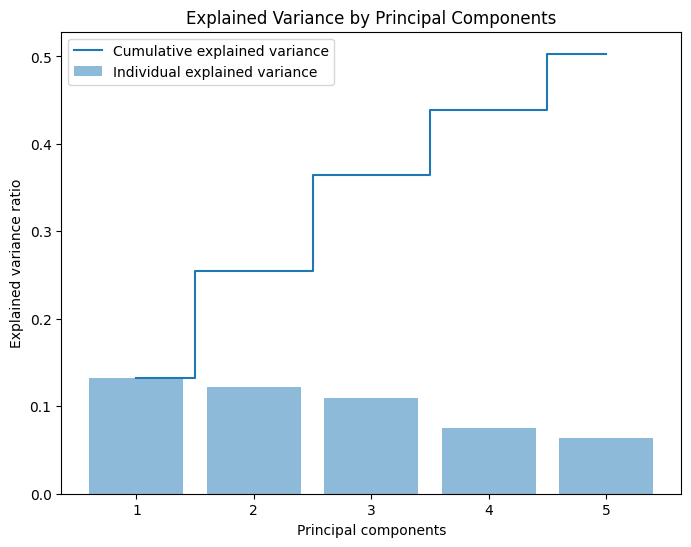

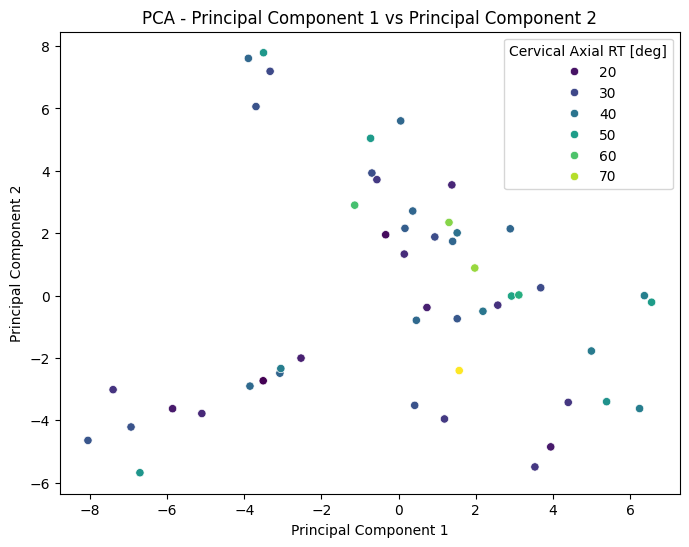

In [40]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=target, data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title=target)
plt.show()

Based on the explained variance, I would imagine that I would only need about 4-5 components to have 50% of the variance explained. 

Silhouette Score: 0.34443117187462485


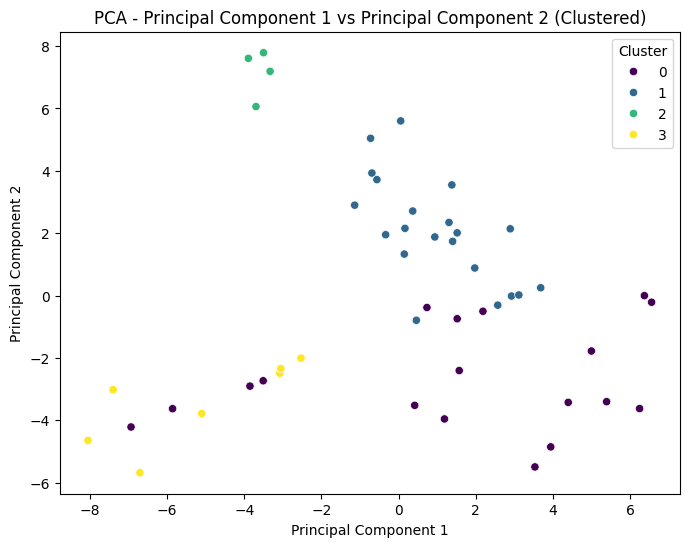

<Figure size 800x600 with 0 Axes>

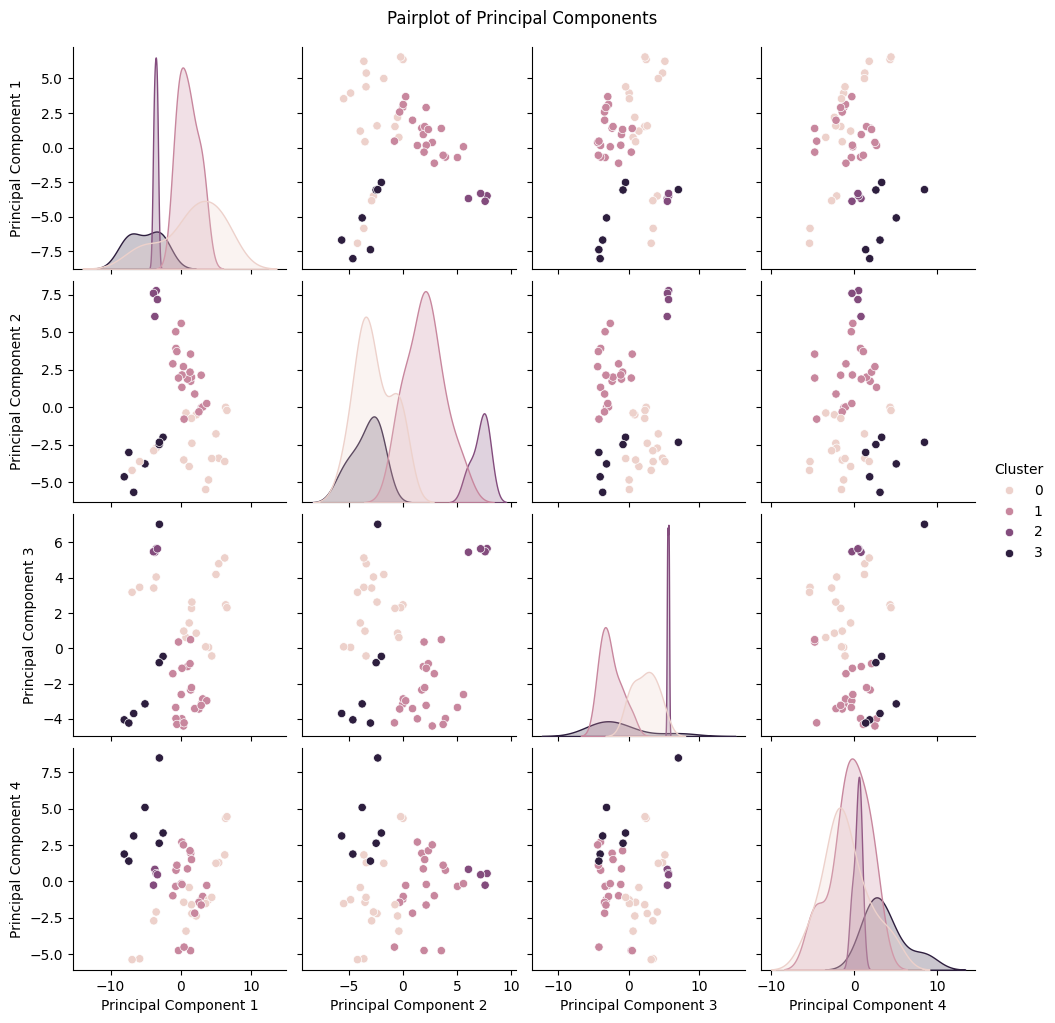

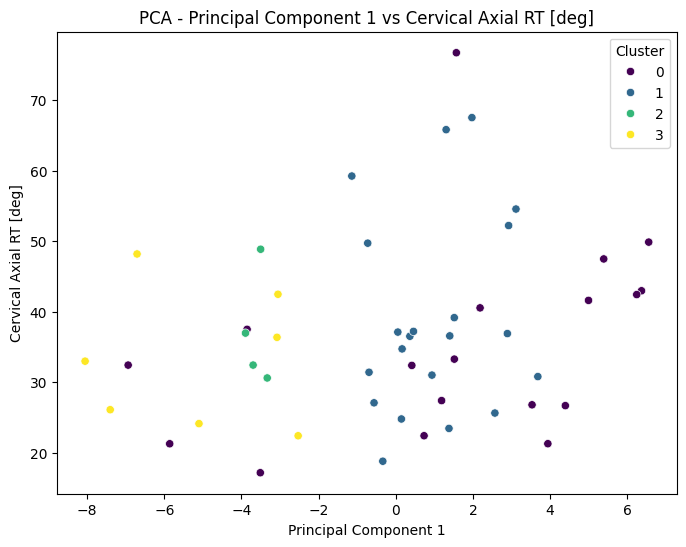

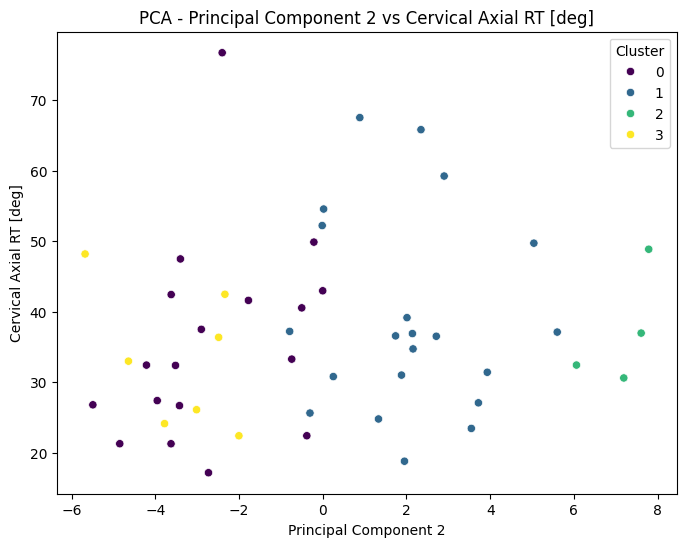

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Display the first few rows of the updated PCA DataFrame
pca_df.head()

# Calculate the silhouette score
silhouette_avg = silhouette_score(principal_components, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Principal Component 2 (Clustered)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Plot the relationship between the principal components and the target variable
plt.figure(figsize=(8, 6))
sns.pairplot(pca_df, hue='Cluster', vars=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'])
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()

# Plot the relationship between the principal components and the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Cervical Axial RT [deg]', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Cervical Axial RT [deg]')
plt.xlabel('Principal Component 1')
plt.ylabel('Cervical Axial RT [deg]')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 2', y='Cervical Axial RT [deg]', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 2 vs Cervical Axial RT [deg]')
plt.xlabel('Principal Component 2')
plt.ylabel('Cervical Axial RT [deg]')
plt.legend(title='Cluster')
plt.show()

#### PCA Analysis and Clustering Results

Explained Variance by Principal Components

The first bar plot shows the explained variance ratio for each principal component. The explained variance ratio indicates how much of the total variance in the data is captured by each principal component. The cumulative explained variance line shows the total variance captured by the first n principal components. This helps us understand how many principal components are needed to capture most of the variance in the data.

#### PCA - Principal Component 1 vs Principal Component 2

The scatter plot shows the relationship between the first two principal components. Each point represents an observation, and the color indicates the value of the target variable, `Cervical Axial RT [deg]`. This plot helps us visualize how the observations are distributed in the space defined by the first two principal components.

#### PCA - Principal Component 1 vs Principal Component 2 (Clustered)

The scatter plot shows the relationship between the first two principal components, with points colored by their cluster labels. The clusters were obtained using KMeans clustering. This plot helps us visualize how the observations are grouped into clusters in the space defined by the first two principal components.

#### Pairplot of Principal Components

The pairplot shows the relationships between the first four principal components. Each subplot is a scatter plot of two principal components, with points colored by their cluster labels. This plot helps us visualize the relationships between the principal components and how the observations are grouped into clusters.

#### PCA - Principal Component 1 vs Cervical Axial RT [deg]

The scatter plot shows the relationship between the first principal component and the target variable, `Cervical Axial RT [deg]`. Each point represents an observation, and the color indicates the cluster label. This plot helps us visualize how the first principal component is related to the target variable.

#### PCA - Principal Component 2 vs Cervical Axial RT [deg]

The scatter plot shows the relationship between the second principal component and the target variable, `Cervical Axial RT [deg]`. Each point represents an observation, and the color indicates the cluster label. This plot helps us visualize how the second principal component is related to the target variable.

The sillhouete score doesn't look very promising for the data. We see that it is only about 0.35 in a range from -1 to 1. This is due to some of the clusters not necessarily being that clustered together. 

Overall, both linear regression and PCA analysis was ineffective in determining good predictability for the data.

# Logistic Regression Model:

In [42]:
data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\combined_sum_duration_dummies_for_regression.csv')

In [43]:
# Initial EDA: Inspecting the target variable and checking for missing values
target = 'Cervical Axial RT [deg]'

# Check for missing values in the dataset
missing_summary = data.isnull().sum()

# Summary statistics for the target variable
target_stats = data[target].describe()

# Displaying missing value summary and target variable statistics
missing_summary_nonzero = missing_summary[missing_summary > 0]
target_stats, missing_summary_nonzero


(count    50.000000
 mean     36.820163
 std      12.973112
 min      17.148950
 25%      26.849290
 50%      35.527460
 75%      42.443022
 max      76.702850
 Name: Cervical Axial RT [deg], dtype: float64,
 Series([], dtype: int64))

In [45]:
from sklearn.model_selection import train_test_split

# Preparing the data for multiple linear regression
X = data.drop(columns=[target])  # Independent variables
y = data[target]  # Dependent variable

# Converting categorical variables to dummy variables (if present)
X = pd.get_dummies(X, drop_first=True)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Convert the target variable to binary based on the median
y_binary = (y >= y.median()).astype(int)

# Splitting the original dataset into training and testing sets for logistic regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Fit a logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_log, y_train_log)

# Predict on test data
y_pred_log = log_model.predict(X_test_log)
y_pred_prob = log_model.predict_proba(X_test_log)[:, 1]

# Evaluate the logistic regression model
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
roc_auc = roc_auc_score(y_test_log, y_pred_prob)

classification_summary = classification_report(y_test_log, y_pred_log)

# Output the accuarcy, precision, recall, and ROC AUC score, and classification summary into a dataframe
logistic_regression_metrics = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'ROC AUC': [roc_auc]
})
logistic_regression_metrics

c:\Users\jrzem\OneDrive - Seton Hill University\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,ROC AUC
0,0.8,0.75,0.75,0.833333


In [47]:
# Output the classification summary
classification_summary

'              precision    recall  f1-score   support\n\n           0       0.83      0.83      0.83         6\n           1       0.75      0.75      0.75         4\n\n    accuracy                           0.80        10\n   macro avg       0.79      0.79      0.79        10\nweighted avg       0.80      0.80      0.80        10\n'

This is by far the best model for the data. We had to set it into a binary version of the target data however. 

- Refinement Steps:
    - Feature Importance:
        - Identify the most influential features in the logistic regression model.
    - Hyperparameter Tuning:
        - Optimize hyperparameters like regularization strength (C) and solver type using grid search or randomized search.
    - Cross-Validation:
        - Evaluate the model's stability using k-fold cross-validation to get more robust metrics.
    - Residual Analysis:
        - Examine misclassified cases to identify potential patterns or issues.
    - Alternative Thresholding:
        - Adjust the decision threshold to optimize precision, recall, or a specific metric (e.g., F1 score).

In [48]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Feature importance analysis
feature_importance = np.abs(log_model.coef_[0])  # Absolute value of coefficients
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Hyperparameter tuning: Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Different solvers
    'penalty': ['l2']  # Using L2 regularization
}

# Grid search with cross-validation
log_reg_tuned = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
log_reg_tuned.fit(X_train_log, y_train_log)

# Best hyperparameters and cross-validated AUC score
best_params = log_reg_tuned.best_params_
best_auc = log_reg_tuned.best_score_

# Cross-validation scores for the tuned model
cv_scores = cross_val_score(
    log_reg_tuned.best_estimator_, X, y_binary, cv=5, scoring='roc_auc'
)

important_features.head(10), best_params, best_auc, cv_scores.mean(), cv_scores.std()


(                                              Feature  Importance
 28                                       Right Radial    1.181928
 27  How many hours of sleep did participant have t...    1.159215
 29                                        Left Radial    0.638395
 59                  Torso-Pelvic Flexion Lat RT [deg]    0.556721
 74                         Role in cath lab_Attending    0.556358
 68                         Race _White Middle Eastern    0.518748
 44                      Cervical Flexion Lat RT [deg]    0.506372
 56                        Torso-Pelvic Axial RT [deg]    0.475609
 43                      Cervical Flexion Lat LT [deg]    0.464242
 22                                          Back Pain    0.375972,
 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
 np.float64(0.4175),
 np.float64(0.624),
 np.float64(0.20489997559785117))

It is hard to come up with a few features that are most important for the model. All the features will have a large impact on the model generally. Furthermore, it is hard to predict the sum of duration risk that an individual will be in for the cervical axial. 

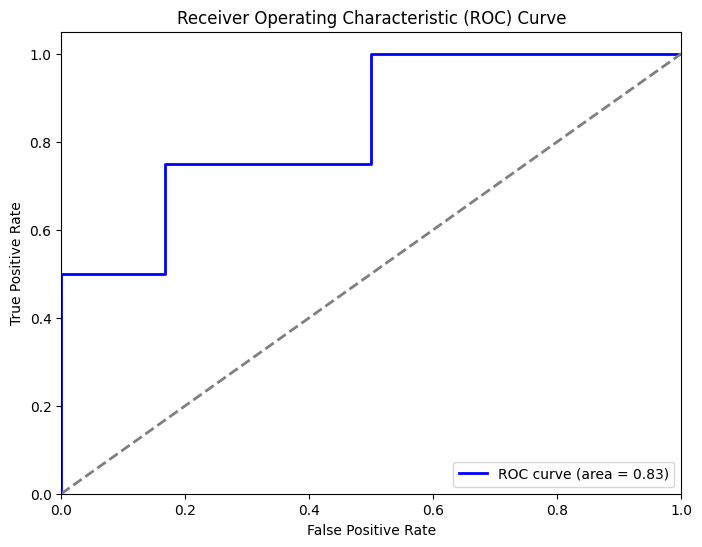

In [49]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

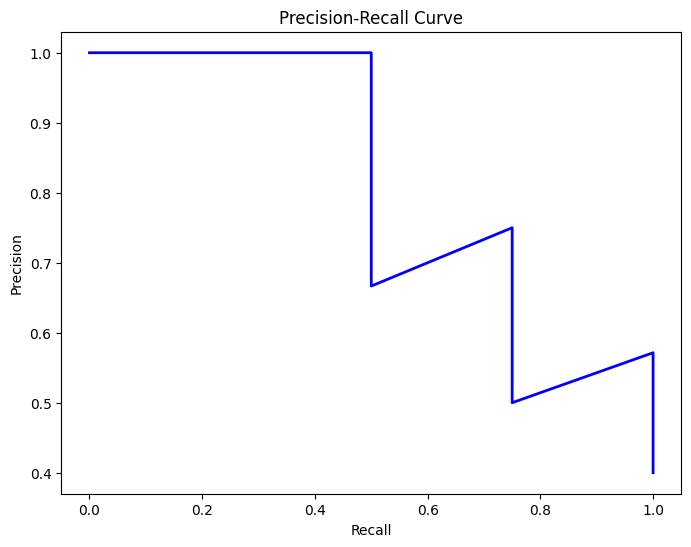

In [51]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test_log, y_pred_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Focus on Certain Predictors:

- Attendings vs. non-attendings at the higher risk thresholds.
- Type of case at higher risk thresholds.
- Case length at higher risk thresholds.
- Those are the key indicators that we would like to look at for the future. 

In [53]:
data = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\combined_sum_duration_dummies_for_regression.csv')

In [55]:
# Look at a more reduced subset of the predictor variables
main_predictors = ['Total case length in minutes (first lidocaine injection - sheath removal)', 
                   'Role in cath lab_Attending','Role in cath lab_General Fellow',
                       	'Role in cath lab_Interventional Fellow','Role in cath lab_Physician Assistant',
                           'Type of Case_CTO PCI',	'Type of Case_Complex PCI',	'Type of Case_Coronary Arteriogram w/ no intervention',
                               	'Type of Case_Non-Complex PCI',	'Type of Case_Other',	'Type of Case_Right heart catheterization',	'Type of Case_TAVR'

]
# Use the same predicted value as before
predicted_value = 'Cervical Axial RT [deg]'

In [ ]:
# Pull the column values from the main dataset
main_data = data[main_predictors + [predicted_value]]

# Add a constant to the predictor variables
predictors = sm.add_constant(main_data.drop(columns=[predicted_value]))

# Fit the multiple linear regression model
model = sm.OLS(main_data[predicted_value], predictors).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Cervical Axial RT [deg]   R-squared:                       0.216
Model:                                 OLS   Adj. R-squared:                  0.015
Method:                      Least Squares   F-statistic:                     1.074
Date:                     Wed, 29 Jan 2025   Prob (F-statistic):              0.405
Time:                             11:01:13   Log-Likelihood:                -192.51
No. Observations:                       50   AIC:                             407.0
Df Residuals:                           39   BIC:                             428.0
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------

Once again multiple regression is not a good method for the data. Look at more PCA analysis and Logistic Regression.

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(multiple_regression_data.drop(columns=[predicted_value]))

# Perform PCA
pca = PCA(n_components=5)  # You can change the number of components as needed
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

# Add the target variable to the DataFrame
pca_df[predicted_value] = multiple_regression_data[predicted_value].values

# Display the first few rows of the PCA DataFrame
pca_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Cervical Axial RT [deg]
0,-0.366600,-0.230934,-0.303136,0.190308,-0.104643,36.55340
1,-0.316138,-0.235372,-0.287795,0.155564,-0.105669,39.13830
2,1.306824,0.117860,-0.604577,2.000345,-0.520100,52.19620
3,1.489747,0.101771,-0.548966,1.874398,-0.523820,54.53905
4,1.325747,0.116195,-0.598824,1.987316,-0.520485,30.99228


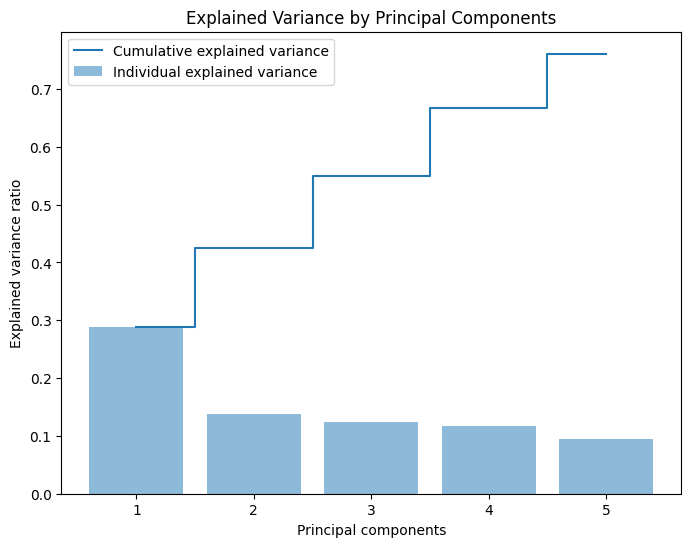

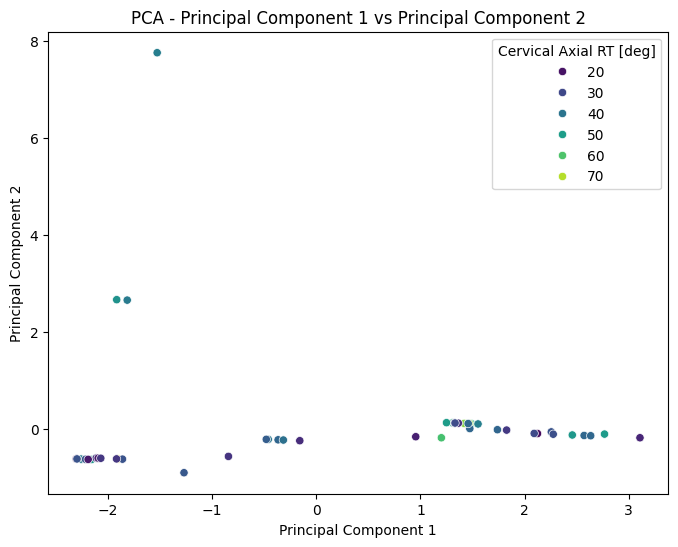

In [61]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=target, data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title=target)
plt.show()

                                                         PC1       PC2  \
const                                              -0.000000  0.000000   
Total case length in minutes (first lidocaine i...  0.455420 -0.040056   
Role in cath lab_Attending                         -0.220680 -0.161605   
Role in cath lab_General Fellow                    -0.128236  0.668179   
Role in cath lab_Interventional Fellow              0.488897 -0.038634   
Role in cath lab_Physician Assistant               -0.324134 -0.201670   
Type of Case_CTO PCI                                0.288077 -0.032319   
Type of Case_Complex PCI                            0.194253 -0.009369   
Type of Case_Coronary Arteriogram w/ no interve... -0.462555 -0.142798   
Type of Case_Non-Complex PCI                        0.032000 -0.047472   
Type of Case_Other                                 -0.052533 -0.078915   
Type of Case_Right heart catheterization           -0.063191  0.672708   
Type of Case_TAVR                     

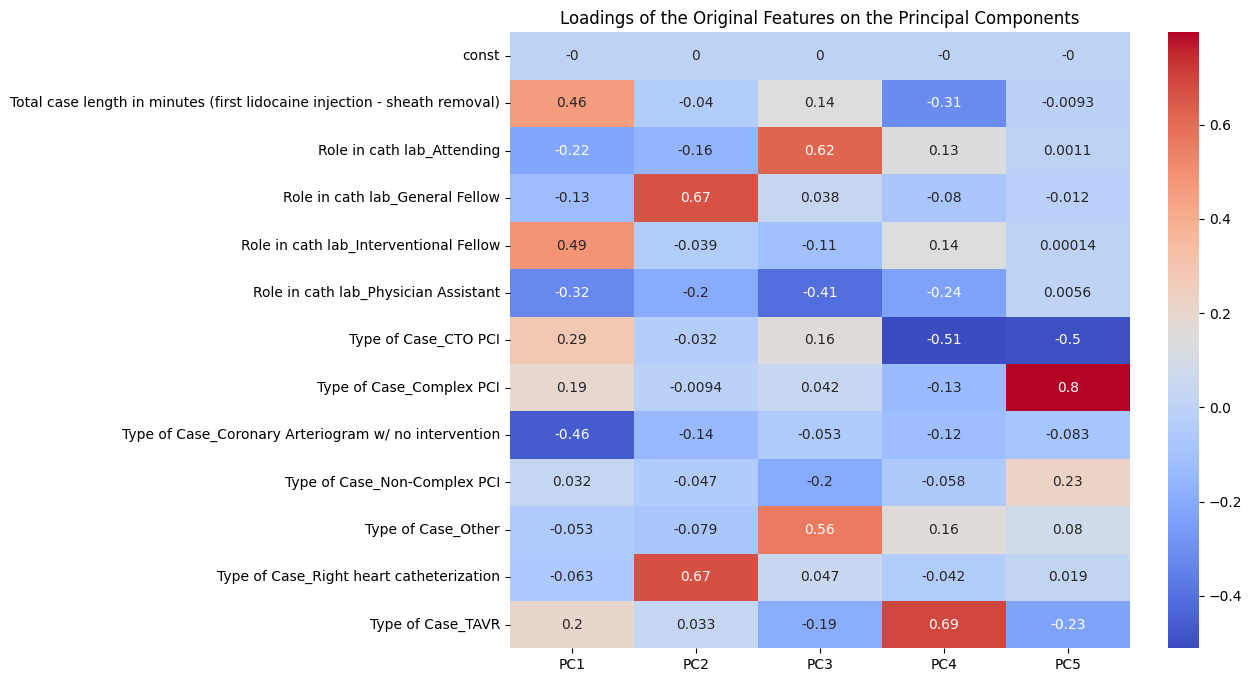

In [63]:
# Analyze the loadings of the original features on the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=multiple_regression_data.drop(columns=[target]).columns)
print(loadings)

# Plot the loadings of the first two principal components
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Loadings of the Original Features on the Principal Components')
plt.show()

Silhouette Score: 0.3925416582451255


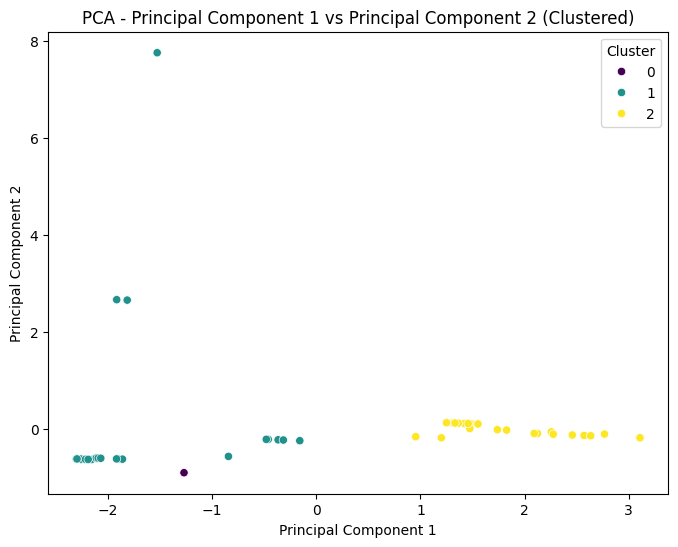

<Figure size 800x600 with 0 Axes>

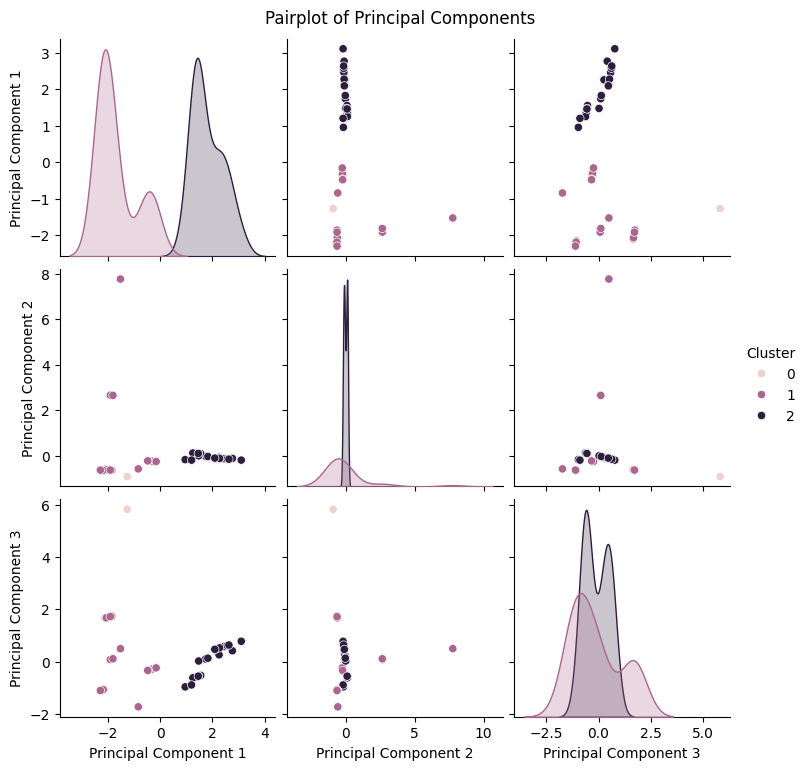

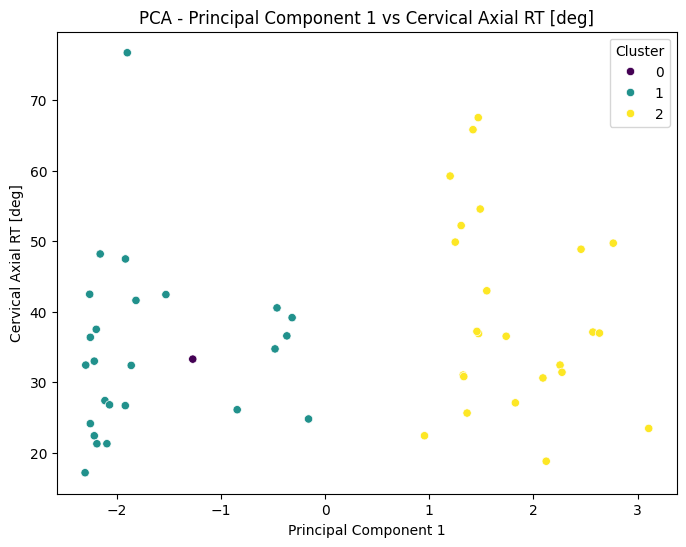

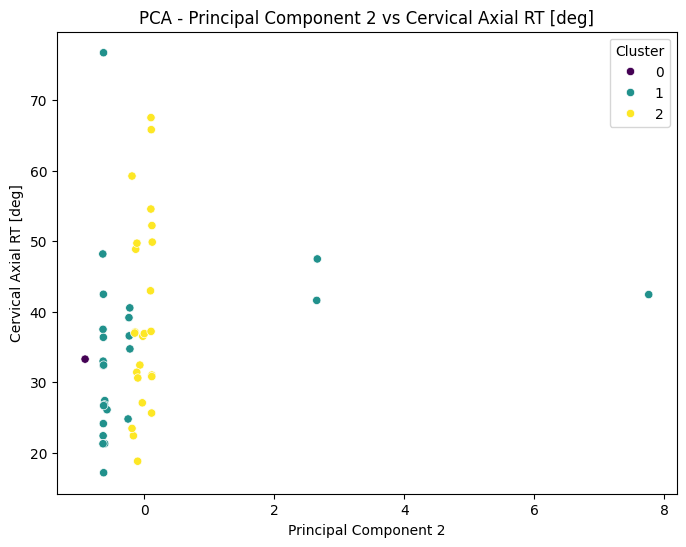

In [65]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Display the first few rows of the updated PCA DataFrame
pca_df.head()

# Calculate the silhouette score
silhouette_avg = silhouette_score(principal_components, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Principal Component 2 (Clustered)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Plot the relationship between the principal components and the target variable
plt.figure(figsize=(8, 6))
sns.pairplot(pca_df, hue='Cluster', vars=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()

# Plot the relationship between the principal components and the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Cervical Axial RT [deg]', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 1 vs Cervical Axial RT [deg]')
plt.xlabel('Principal Component 1')
plt.ylabel('Cervical Axial RT [deg]')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 2', y='Cervical Axial RT [deg]', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA - Principal Component 2 vs Cervical Axial RT [deg]')
plt.xlabel('Principal Component 2')
plt.ylabel('Cervical Axial RT [deg]')
plt.legend(title='Cluster')
plt.show()

The principal component analysis performed slightly better through this method, but there were still a lot of areas for improvement. We will now look at the logistic regression model with this subset of predictors.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Define the main predictors and the target variable
main_predictors = ['Total case length in minutes (first lidocaine injection - sheath removal)', 
                   'Role in cath lab_Attending', 'Role in cath lab_General Fellow',
                   'Role in cath lab_Interventional Fellow', 'Role in cath lab_Physician Assistant',
                   'Type of Case_CTO PCI', 'Type of Case_Complex PCI', 
                   'Type of Case_Coronary Arteriogram w/ no intervention', 
                   'Type of Case_Non-Complex PCI', 'Type of Case_Other', 
                   'Type of Case_Right heart catheterization', 'Type of Case_TAVR']
predicted_value = 'Cervical Axial RT [deg]'

# Prepare the data
X = data[main_predictors]
y = (data[predicted_value] >= data[predicted_value].median()).astype(int)  # Convert to binary target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_summary = classification_report(y_test, y_pred)

# Output the evaluation metrics
logistic_regression_metrics = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'ROC AUC': [roc_auc]
})
print(logistic_regression_metrics)
print(classification_summary)

   Accuracy  Precision  Recall   ROC AUC
0       0.7   0.666667     0.5  0.666667
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



Here we see the accuracy is reduced compared to the other model, but we do have a reduced set of predictors which really helps in our understanding of what occurs when.

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Feature importance analysis
feature_importance = np.abs(log_model.coef_[0])  # Absolute value of coefficients
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Hyperparameter tuning: Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Different solvers
    'penalty': ['l2']  # Using L2 regularization
}

# Grid search with cross-validation
log_reg_tuned = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
log_reg_tuned.fit(X_train_log, y_train_log)

# Best hyperparameters and cross-validated AUC score
best_params = log_reg_tuned.best_params_
best_auc = log_reg_tuned.best_score_

# Cross-validation scores for the tuned model
cv_scores = cross_val_score(
    log_reg_tuned.best_estimator_, X, y_binary, cv=5, scoring='roc_auc'
)

important_features.head(10), best_params, best_auc, cv_scores.mean(), cv_scores.std()

(                                              Feature  Importance
 1                          Role in cath lab_Attending    0.960106
 2                     Role in cath lab_General Fellow    0.668272
 11                                  Type of Case_TAVR    0.499795
 5                                Type of Case_CTO PCI    0.417589
 3              Role in cath lab_Interventional Fellow    0.325028
 10           Type of Case_Right heart catheterization    0.291217
 9                                  Type of Case_Other    0.224361
 8                        Type of Case_Non-Complex PCI    0.097249
 7   Type of Case_Coronary Arteriogram w/ no interv...    0.097198
 6                            Type of Case_Complex PCI    0.042227,
 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
 np.float64(0.4175),
 np.float64(0.5680000000000001),
 np.float64(0.19497692171126305))

From this case, we see the best features to look at in feature importance are the role in cath lab whether attending or general fellow. Furthermore, the type of case for instance is just as important it would appear. This is interesting for determining what causes most of this risk in individuals of the high cervical axial degrees outside of normal threshold. 

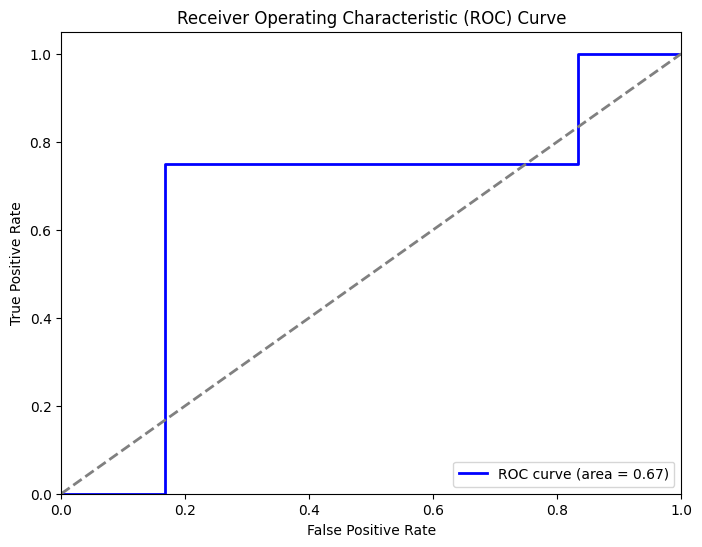

In [68]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

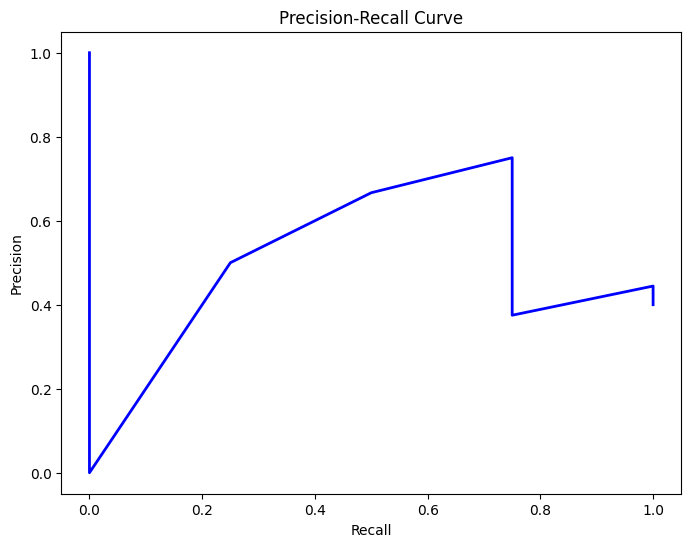

In [69]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test_log, y_pred_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()